In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_processing import load_data_np, visualize20

In [2]:
train_images = '../data/in/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels = '../data/in/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images = '../data/in/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels = '../data/in/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [3]:
X_train, X_test, y_train, y_test = load_data_np(train_images, train_labels, test_images, test_labels)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [6]:
classifier.score(X_test, y_test)

0.9469

In [7]:
y_batch = y_test[:20]
X_batch_mtrx = X_test[:20,:]
X_batch_img = X_test[:20,:].reshape((20, 28, 28))

In [8]:
y_pred = classifier.predict(X_batch_mtrx)

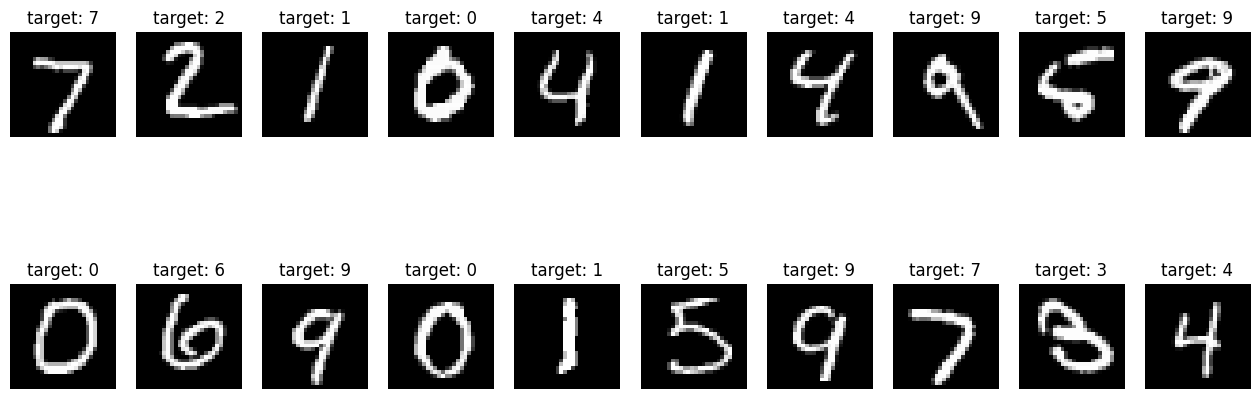

In [9]:
visualize20(X_batch_img, y_batch)

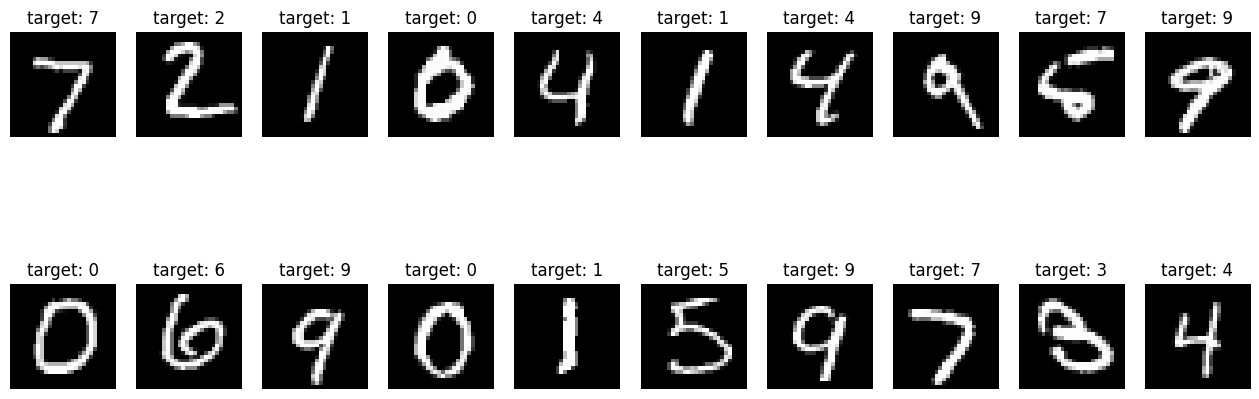

In [10]:
visualize20(X_batch_img, y_pred)

In [11]:
from xgboost import XGBClassifier

In [12]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',nthread=6)

In [13]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, nthread=6, num_parallel_tree=None, ...)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9795
